### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import numpy as np
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
data = pd.read_csv('Data.csv')
user = pd.read_csv('user.csv')
item = pd.read_csv('item.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [7]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [8]:
data.shape

(100000, 4)

In [9]:
user.shape

(943, 5)

In [10]:
item.shape

(1681, 22)

In [11]:
data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [12]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [13]:
item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.isnull().sum(axis=0)

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [15]:
user.isnull().sum(axis=0)

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [16]:
item.isnull().sum(axis = 0)

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [17]:
print(item.sum())

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [18]:
print(item.sum(axis=1))

0          4
1          5
2          4
3          7
4          8
        ... 
1676    1679
1677    1681
1678    1682
1679    1682
1680    1683
Length: 1681, dtype: int64


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [19]:
item = item.drop('unknown', 1)

In [20]:
#printing the sum of item dataset to check whether the drop worked out fine.
print(item.sum())

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical                                                        56
Mystery   

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [21]:
# HINT: use bar plot for rating, countplot/distplot for age; release date and countplot for gender and occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [22]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


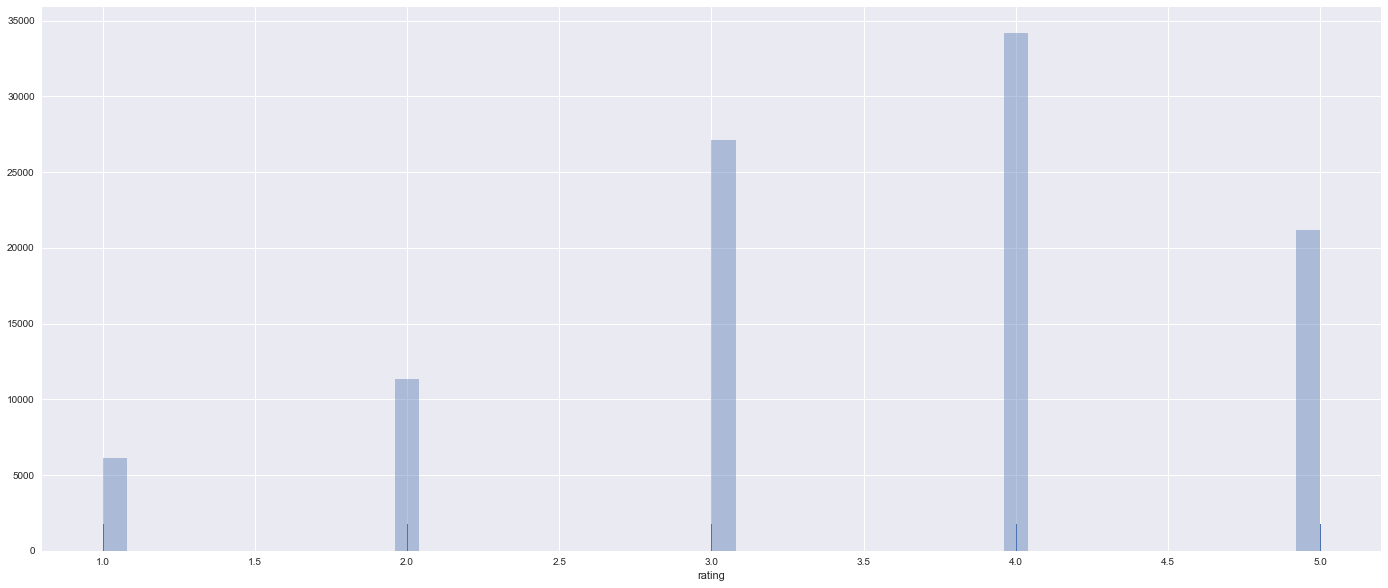

In [23]:
#plotting the distribution of ratings
plt.figure(figsize = (24,10))
sns.distplot(data.rating, kde = False, rug = True)

In [24]:
#understanding user data

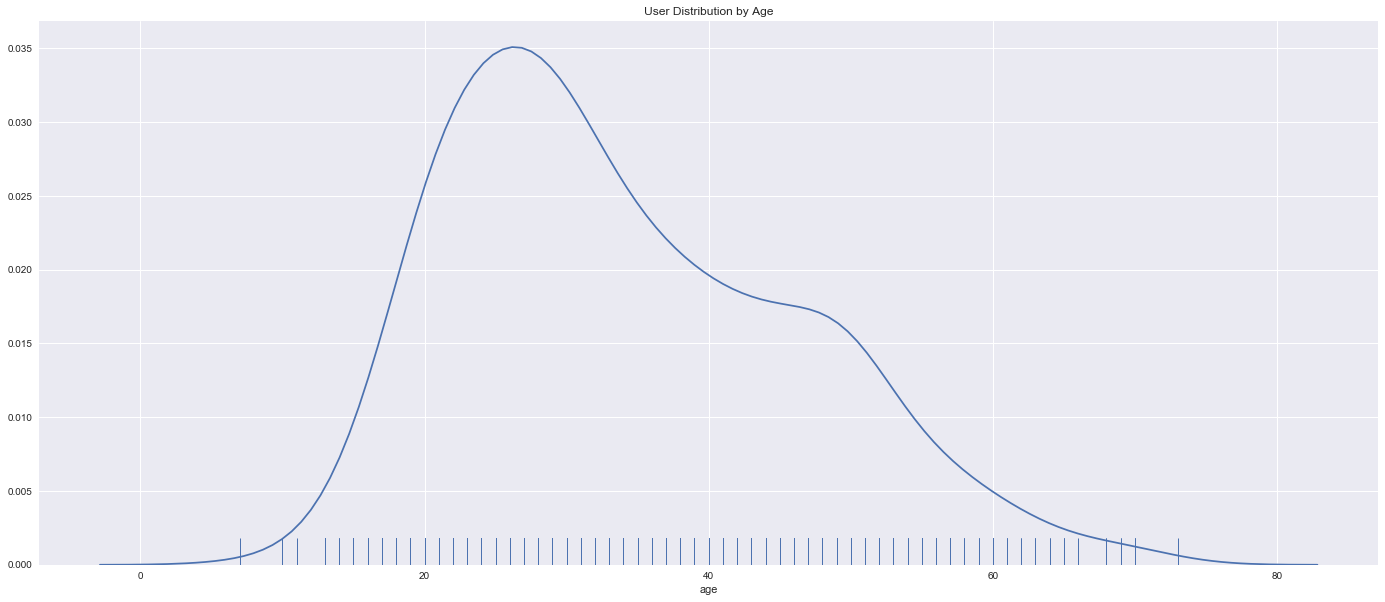

In [25]:
#plotting user age
user.head()
plt.figure(figsize = (24,10))
plt.title('User Distribution by Age')
sns.distplot(user.age, hist = False, rug = True)

In [26]:
#transforming release date into year information
item['year'] = pd.to_datetime(item['release date']).dt.year

In [27]:
#checking if the transformation worked
item['year'].head()

0    1995
1    1995
2    1995
3    1995
4    1995
Name: year, dtype: int64

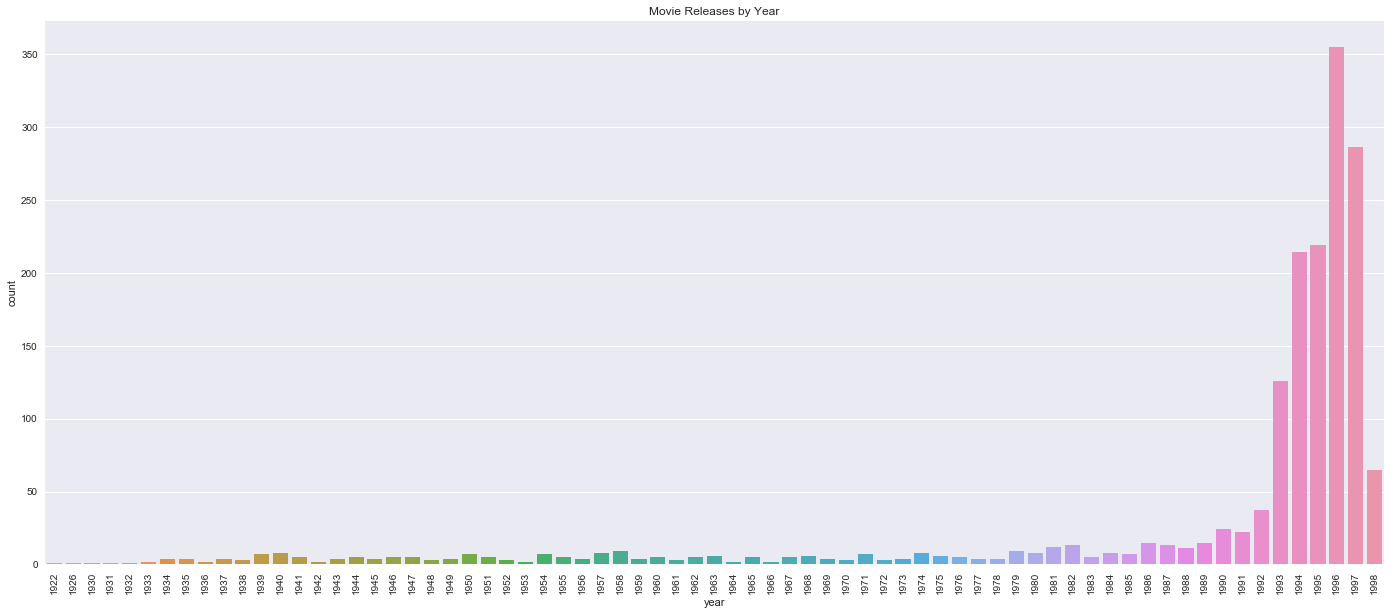

In [28]:
#plotting release year
plt.figure(figsize = (24,10))
plt.xticks(rotation = 90)
plt.title('Movie Releases by Year')
sns.countplot(item['year'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [33]:
#creating a new object <- genres
genres = item
genres = genres.drop('movie id', 1)
genres = genres.drop('movie title', 1)
genres = genres.drop('release date', 1)
genres.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995


In [34]:
#arranging the dataset
group = genres.groupby('year', as_index = True).sum()
print(group)


      Action  Adventure  Animation  Childrens  Comedy  Crime  Documentary  \
year                                                                        
1922       0          0          0          0       0      0            0   
1926       0          0          0          0       0      0            0   
1930       0          0          0          0       0      0            0   
1931       0          0          0          0       0      1            0   
1932       0          0          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
1994      30         13          4         15      82      8            9   
1995      40         22          6         21      63     11            5   
1996      44         24          9         21     108     21           18   
1997      46         20          3         22      87     30            6   
1998      12          3          0          1      13      7            3   

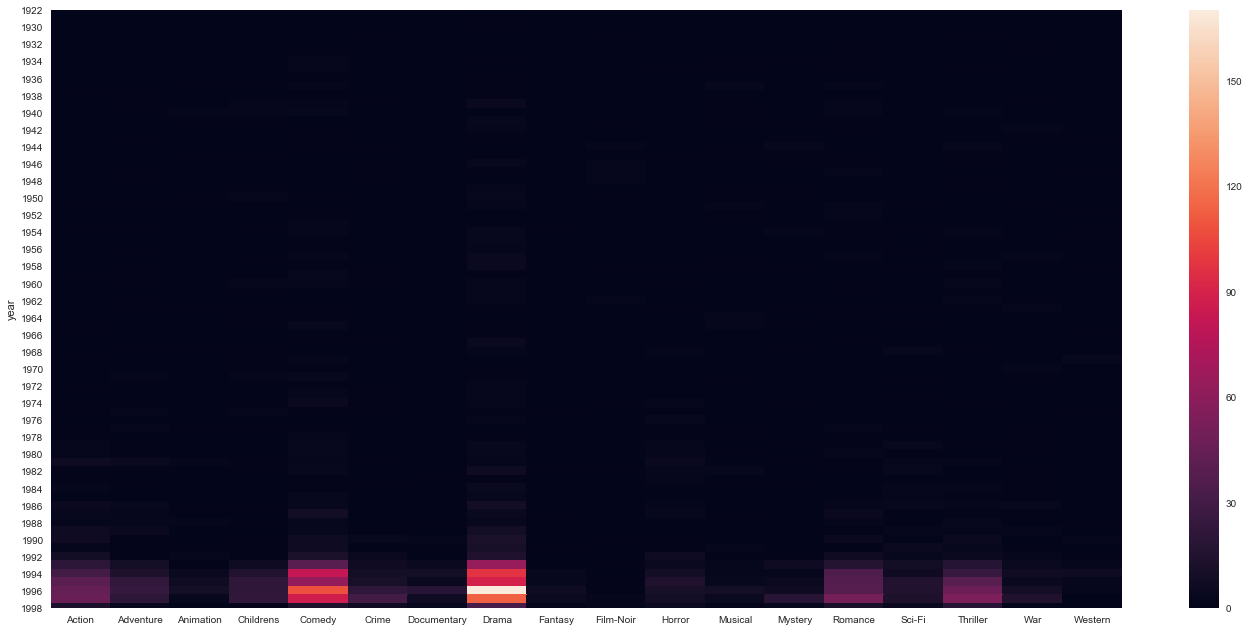

In [35]:
plt.figure(figsize = (24,11))
sns.heatmap(group)


### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [55]:
#creating a new object grouped by movie id
lens = pd.merge(data, item, on = 'movie id')


In [56]:
#checking out the result
lens.head()

,user id,movie id,rating,timestamp,movie title,release date,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1,63,242,3,875747190,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
2,226,242,5,883888671,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
3,154,242,3,879138235,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
4,306,242,5,876503793,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997


In [95]:
#find movies with more than 100 ratings
#step 1 - create a dataset with the number of times a movie was rated
CountMovies = lens.groupby('movie title')['rating'].count()
#step 2 - create a dataset with the average rating of each movie
AvgRating = lens.groupby('movie title')['rating'].mean()
#step 3 - merge both datasets 
RatingAvgCount = pd.merge(CountMovies, AvgRating, on = 'movie title')
#step 4 - select best movies within the condition of at least 100 ratings
MoreThan100 = RatingAvgCount[RatingAvgCount.rating_x >= 100].sort_values('rating_y')
#step 5 - renaming the columns for clarity
MoreThan100.columns = ['#Ratings', 'Average Rating']
MoreThan100.tail(25)


,#Ratings,Average Rating
movie title,,
"Empire Strikes Back, The",367,4.204360
"Maltese Falcon, The",138,4.210145
Lawrence of Arabia,173,4.231214
Titanic,350,4.245714
Vertigo,179,4.251397
Raiders of the Lost Ark,420,4.252381
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,194,4.252577
"Manchurian Candidate, The",131,4.259542
Good Will Hunting,198,4.262626


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [100]:
#creating a merge dataset for user and data
UserRating = pd.merge(lens, user, on = 'user id')

#checking the result
UserRating.head(5)





,user id,movie id,rating,timestamp,movie title,release date,Action,Adventure,Animation,Childrens,...,Romance,Sci-Fi,Thriller,War,Western,year,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,1997,49,M,writer,55105
1,196,257,2,881251577,Men in Black,04-Jul-1997,1,1,0,0,...,0,1,0,0,0,1997,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-1996,0,0,0,0,...,1,0,0,0,0,1996,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The",08-Mar-1996,0,0,0,0,...,0,0,0,0,0,1996,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0,0,0,0,...,0,0,0,0,0,1994,49,M,writer,55105


In [149]:
#Finding the number of ratings for drama per gender.
DramaAll = UserRating[['Drama', 'Sci-Fi', 'Romance', 'gender']]
DramaGender = DramaAll.groupby('gender').sum()
DramaGender.head()

,Drama,Sci-Fi,Romance
gender,,,
F,11008,2629,5858
M,28887,10101,13603


There are more men reviewing Drama movies; however, there seems to be more men reviewing movies at all.

In [144]:
#Finding out the Dataset proportion of men and women in the dataset.
Count = UserRating.groupby('gender').count()
Count = Count['user id']
Count.head()

gender
F    25738
M    74253
Name: user id, dtype: int64

In [145]:
#calculating the % of women reviewing Drama Movies.
11008/25738

0.4276944595539669

In [146]:
#calculating the % of men reviewing Drama Movies.
28887/74253

0.38903478647327383

Conclusion : There are proportionally more women reviewing Drama Movies than men. Therefore, 

In [150]:
#calculating the % of women reviewing Sci - Fi movies
2629/25738

0.10214468878700754

In [154]:
#calculating the % of men reviewing Sci - Fi movies.
10101/74253

0.13603490768049775

Conclusion: Men do watch more Sci-Fi proportionally

In [152]:
#calculating the % of women watching Romance
5858/25738

0.22760121221540136

In [153]:
#calculating the % of men watching Romance
13603/74253

0.18319798526658856

Conclusion: Women watch more Romance than men.

#### Conclusion:
Men watch more drama than women - False
Women watch more Sci-Fi than men - False
Men watch more Romance than women - False
